
# **Midterm Project - Data Analysis and Model Selection**

* The main objective will be to predict the compression strength of a concrete mixture after n days of curing under normal conditions.
* The dataset consists of information about different concrete mixtures cured at various ages (days) and the resulting compression strength will be used for analysis.
* Both linear regression and decision tree regression models will be tested in this project.
* The model that presents better results will be selected for further analysis.
* For this project, the following GitHub repository will be used:
  * [GitHub Repository Link](https://github.com/AndresLDF/ML-Zoomcamp-Midterm-Project)

## **1- Dataset Analysis**

* The concrete dataset `Concrete_Data_Yeh.csv` will be used for analysis.
* The dataset was downloaded from [Kaggle](https://www.kaggle.com/datasets/maajdl/yeh-concret-data).
* After downloading the dataset, it was uploaded to the GitHub repository for this project.
* The units for the different values in the dataset are:
  * **Cement:** kg in a m3 mixture
  * **Flyash:** kg in a m3 mixture
  * **Water:** kg in a m3 mixture
  * **Super Plasticizer:** kg in a m3 mixture
  * **Coarse Aggregate:** kg in a m3 mixture
  * **Fine Aggregate:** kg in a m3 mixture
  * **Age:** Days
  * **Compression Strength (csMPa):** MPa

I was not able to find a dataset with the fine and coarse aggregate granulometry and other information related to the aggregate that would be helpful for a more precise prediction. Therefore, I chose this dataset as it contains enough entries for good training, evaluation, and testing.


In [1]:
import requests
import numpy as np
import pandas as pd
from io import StringIO
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
url = "https://github.com/AndresLDF/ML-Zoomcamp-Midterm-Project/raw/main/DataSet/Concrete_Data_Yeh.csv"

In [3]:
response = requests.get(url)

In [4]:
if response.status_code==200:
  file = StringIO(response.text)
  df = pd.read_csv(file)
df

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


### **1-1 Dataset Columns Analysis**

In [5]:
df.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

In [6]:
#Set all the columns labels to lower case
df.columns = df.columns.str.lower()
df.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csmpa'],
      dtype='object')

In [7]:
#Check if there is any null value
df.isna().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csmpa               0
dtype: int64

In [8]:
#There are not null values.
#Proceed to check the Dtype for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csmpa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [9]:
#Unique values for the age. This is important as the ages are standarized in the cement industry
df.age.unique()

array([ 28, 270, 365, 360,  90, 180,   3,   7,  56,  91,  14, 100, 120,
         1])

From the The about quick analysis of the Dataset compomsition, we know the followings:
1. There are 8 variables that determine the objective value "csmpa"
2. There are no missing values
3. All the columns are numerical values


### **1-2 Dataset infromation Analysis**

In [10]:
#The dataset is composed by numericla values, no categorical colum was found
#Now I will list the main characteristics of each column like min, max, and mean values between others
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csmpa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


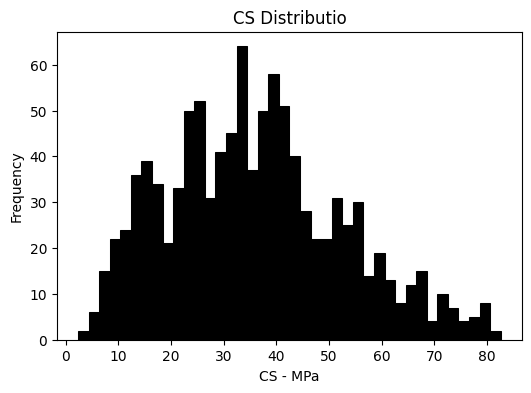

In [11]:
plt.figure(figsize=(6, 4))

sns.histplot(df.csmpa, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('CS - MPa')
plt.title('CS Distributio')

plt.show()



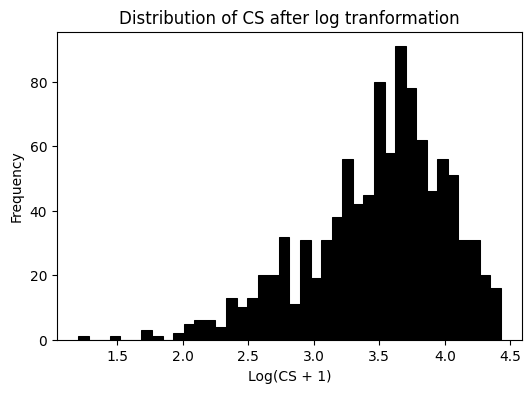

In [12]:

log_cs = np.log1p(df.csmpa)

plt.figure(figsize=(6, 4))

sns.histplot(log_cs, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(CS + 1)')
plt.title('Distribution of CS after log tranformation')

plt.show()



From the presented information, we can observe the following points:

1. The maximum strength is 82.6 MPa, but most of the concrete information falls below 46 MPa (75%). This may result in a lower probability of predicting High-Strength Concretes. It is expected that the predictions will be accurate within a normal range. This observation is also supported by the tail in the csmpa distribution graphic.

2. The variation in cement content in the dataset is substantial. This variation is expected to facilitate the analysis of the dependency of concrete strength on cement content, enabling accurate predictions. Cement is the most expensive material in the mixture, except for superplasticizer, which is always used in low quantities. Optimizing the cement content is a key method to reduce the overall concrete cost.

3. Seventy-five percent of the data corresponds to ages below 56 days. This may influence the expected impact of fly ashes and slag on concrete strength. These materials have a very low hydration velocity, which continues to impact strength even after one year.

4. The distribution of Compressive Strength follows an almost Gaussian distribution with a tail that is not excessively long. Based on this behavior, no logarithmic transformation will be applied to the data. I will work with the Compressive Strength values as they are, without applying logarithms.


### **1-3 Correlation analysis of individual variables against CS


In [13]:
values = (df.columns.to_list()).pop()
values

'csmpa'

In [14]:
print("The Correlation Coeficients for th different variables are:")
clist = df.columns.to_list()
clist.pop()
for column in clist:
  correlation = df[column].corr(df['csmpa'])
  print(f"    {column}: {np.round(correlation, 3)}")

The Correlation Coeficients for th different variables are:
    cement: 0.498
    slag: 0.135
    flyash: -0.106
    water: -0.29
    superplasticizer: 0.366
    coarseaggregate: -0.165
    fineaggregate: -0.167
    age: 0.329


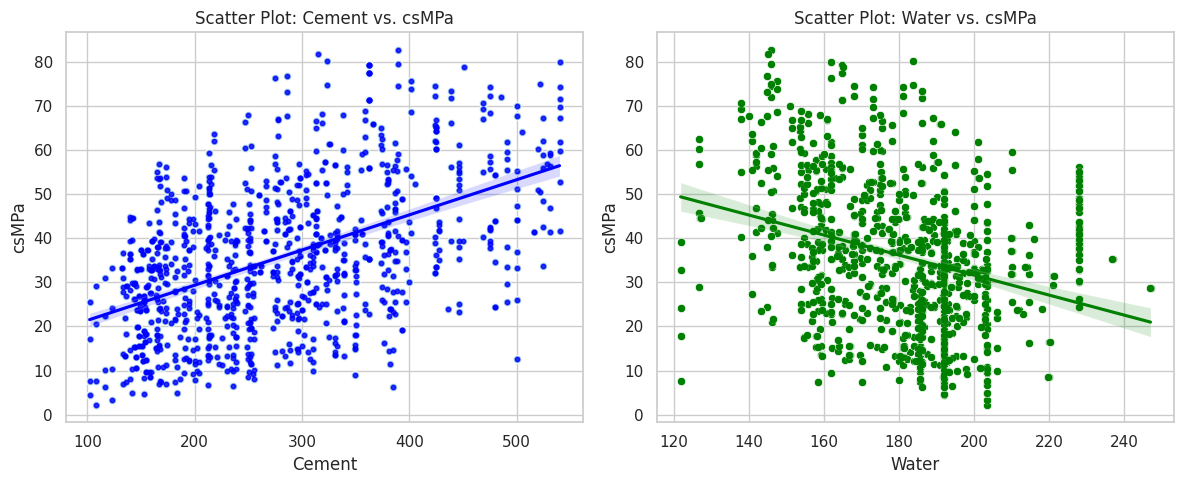

In [15]:
sns.set(style="whitegrid")

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first scatter plot (cement vs. csMPa)
sns.scatterplot(data=df, x="cement", y="csmpa", ax=axes[0], color='lightblue')
sns.regplot(data=df, x="cement", y="csmpa", ax=axes[0], color='blue', scatter_kws={'s': 10})
axes[0].set_title('Scatter Plot: Cement vs. csMPa')
axes[0].set_xlabel('Cement')
axes[0].set_ylabel('csMPa')

# Plot the second scatter plot (water vs. csMPa)
sns.scatterplot(data=df, x="water", y="csmpa", ax=axes[1], color='green')
sns.regplot(data=df, x="water", y="csmpa", ax=axes[1], color='green', scatter_kws={'s': 10})
axes[1].set_title('Scatter Plot: Water vs. csMPa')
axes[1].set_xlabel('Water')
axes[1].set_ylabel('csMPa')

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

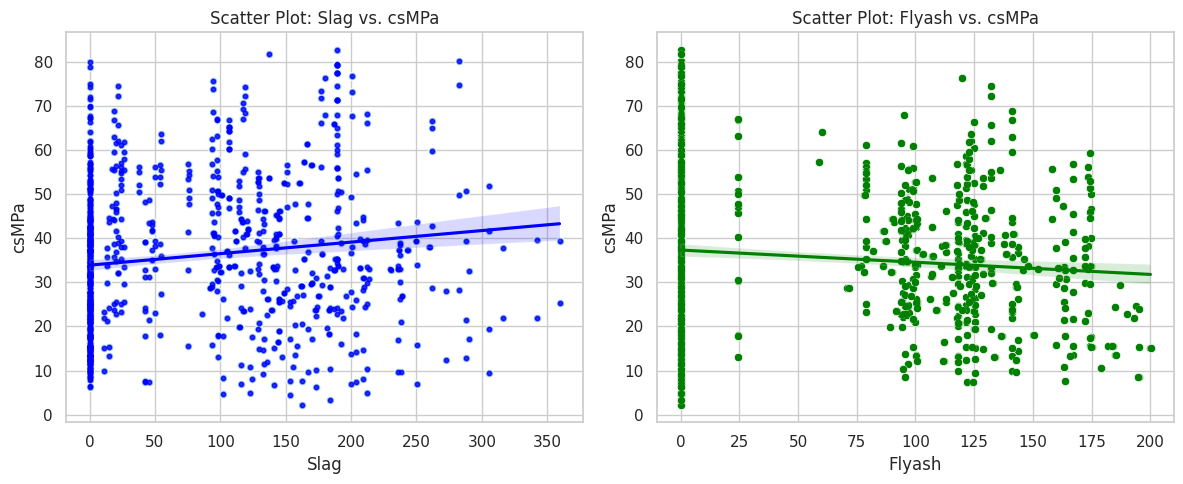

In [16]:
sns.set(style="whitegrid")

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first scatter plot (Slag vs. csMPa)
sns.scatterplot(data=df, x="slag", y="csmpa", ax=axes[0], color='lightblue')
sns.regplot(data=df, x="slag", y="csmpa", ax=axes[0], color='blue', scatter_kws={'s': 10})
axes[0].set_title('Scatter Plot: Slag vs. csMPa')
axes[0].set_xlabel('Slag')
axes[0].set_ylabel('csMPa')

# Plot the second scatter plot (Flyash vs. csMPa)
sns.scatterplot(data=df, x="flyash", y="csmpa", ax=axes[1], color='green')
sns.regplot(data=df, x="flyash", y="csmpa", ax=axes[1], color='green', scatter_kws={'s': 10})
axes[1].set_title('Scatter Plot: Flyash vs. csMPa')
axes[1].set_xlabel('Flyash')
axes[1].set_ylabel('csMPa')

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

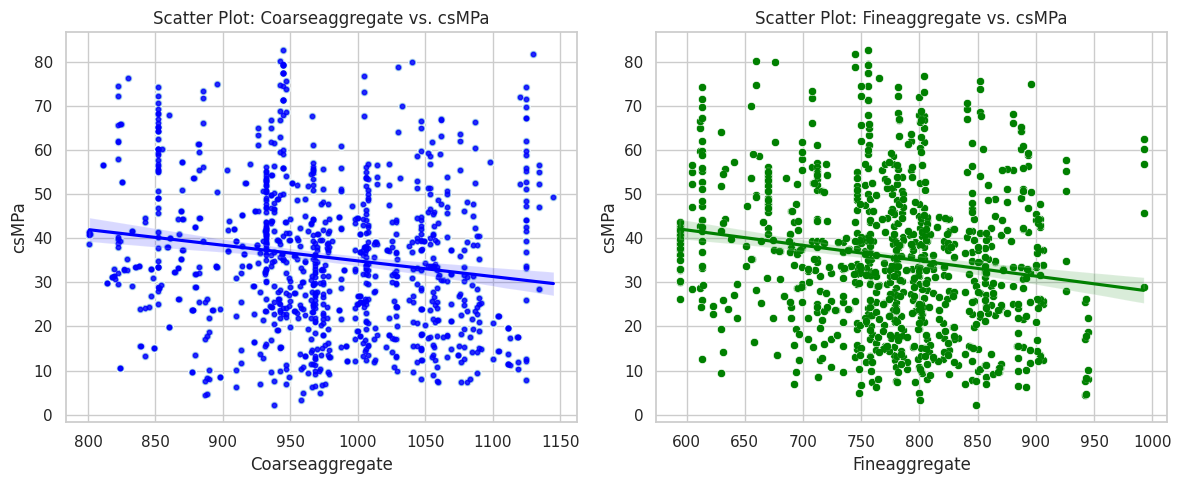

In [17]:
sns.set(style="whitegrid")

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first scatter plot (Coarseaggregate vs. csMPa)
sns.scatterplot(data=df, x="coarseaggregate", y="csmpa", ax=axes[0], color='lightblue')
sns.regplot(data=df, x="coarseaggregate", y="csmpa", ax=axes[0], color='blue', scatter_kws={'s': 10})
axes[0].set_title('Scatter Plot: Coarseaggregate vs. csMPa')
axes[0].set_xlabel('Coarseaggregate')
axes[0].set_ylabel('csMPa')

# Plot the second scatter plot (fineaggregate vs. csMPa)
sns.scatterplot(data=df, x="fineaggregate", y="csmpa", ax=axes[1], color='green')
sns.regplot(data=df, x="fineaggregate", y="csmpa", ax=axes[1], color='green', scatter_kws={'s': 10})
axes[1].set_title('Scatter Plot: Fineaggregate vs. csMPa')
axes[1].set_xlabel('Fineaggregate')
axes[1].set_ylabel('csMPa')

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

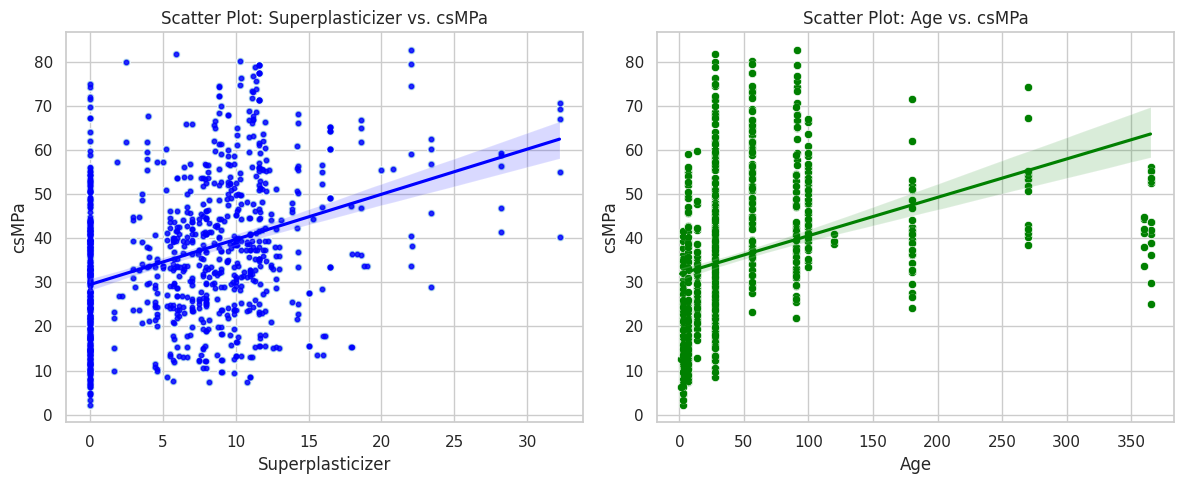

In [18]:
sns.set(style="whitegrid")

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first scatter plot (superplasticizer vs. csMPa)
sns.scatterplot(data=df, x="superplasticizer", y="csmpa", ax=axes[0], color='lightblue')
sns.regplot(data=df, x="superplasticizer", y="csmpa", ax=axes[0], color='blue', scatter_kws={'s': 10})
axes[0].set_title('Scatter Plot: Superplasticizer vs. csMPa')
axes[0].set_xlabel('Superplasticizer')
axes[0].set_ylabel('csMPa')

# Plot the second scatter plot (Age vs. csMPa)
sns.scatterplot(data=df, x="age", y="csmpa", ax=axes[1], color='green')
sns.regplot(data=df, x="age", y="csmpa", ax=axes[1], color='green', scatter_kws={'s': 10})
axes[1].set_title('Scatter Plot: Age vs. csMPa')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('csMPa')

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


From the correlation analysis, we can observe the following points:

1. As expected in a concrete mixture, the variables with higher absolute correlation coefficients are related to cement content, superplasticizer content, curing age, and water content. Among these variables, water content is the only one that negatively impacts concrete strength.

2. The graphics confirm the correlations mentioned in point 1. However, a very high dispersion is observed. This occurs because compressive strength (CS) depends on the interaction of each variable, not just individual values.

3. Furthermore, graphical analysis reveals some degree of linearity for water, cement, and superplasticizer content, but not for the age variable. While linear methods might be expected to work, non-linearity could potentially yield better results.

In [19]:
df

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csmpa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


##  **2- Linear Regression for Compress Strenght Prediction**

### 2.1 Apply linear regression to the whole model
In this first attemp of acchiving a linear model, the information will be fitted as it is to the sklearn linear regression model. As not all the variables are lineal, a perfect match is not expected

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [21]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=4)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=4)
df_full_train.shape, df_train.shape, df_val.shape, df_test.shape

((824, 9), (618, 9), (206, 9), (206, 9))

In [22]:
y_fulltrain = df_full_train["csmpa"].values
y_train = df_train["csmpa"].values
y_val = df_val["csmpa"].values
y_test = df_test["csmpa"].values

In [23]:
del df_full_train["csmpa"]
del df_train["csmpa"]
del df_val["csmpa"]
del df_test["csmpa"]

In [24]:
X_fulltrain = df_full_train.values
X_train = df_train.values
X_val = df_val.values
X_test = df_test.values


In [25]:
reg = LinearRegression().fit(X_train, y_train)
R2_train = reg.score(X_train, y_train)

y_train_pred = reg.predict(X_train)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)

R2_train, rmse_train

(0.6246939562210851, 10.33884033071812)

<Axes: ylabel='Count'>

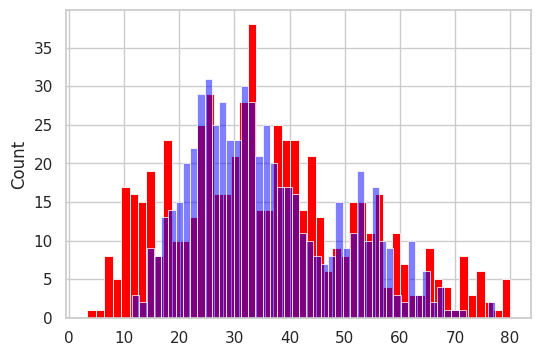

In [26]:
plt.figure(figsize=(6,4))
sns.histplot(y_train, alpha=1, color = "red", bins=50)
sns.histplot(y_train_pred, alpha=0.5, color = "blue", bins=50)

In [27]:
y_val_pred = reg.predict(X_val)

rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)

rmse_train

10.33884033071812

<Axes: ylabel='Count'>

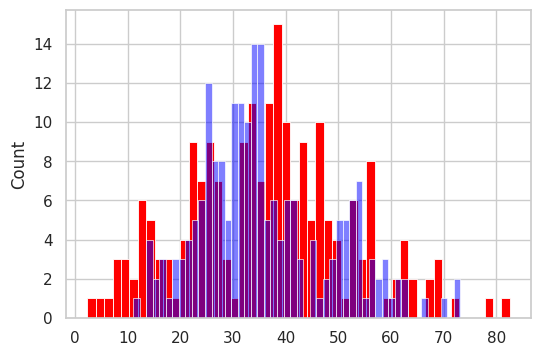

In [28]:
plt.figure(figsize=(6,4))
sns.histplot(y_val, alpha=1, color = "red", bins=50)
sns.histplot(y_val_pred, alpha=0.5, color = "blue", bins=50)

### Feature Engenireeng - Age and Superplastezier Logarithm
As is well know, the correlation between the strengh and the ages is logaritmic, so takin the logaritm of the age and them applyin the lineal convertion over it should improve the results

In [29]:
df_al= df.copy()
df_al.age = np.log(df_al.age)

In [30]:
df_full_train, df_test = train_test_split(df_al, test_size=0.2, random_state=4)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=4)
df_full_train.shape, df_train.shape, df_val.shape, df_test.shape

y_fulltrain = df_full_train["csmpa"].values
y_train = df_train["csmpa"].values
y_val = df_val["csmpa"].values
y_test = df_test["csmpa"].values

del df_full_train["csmpa"]
del df_train["csmpa"]
del df_val["csmpa"]
del df_test["csmpa"]

X_fulltrain = df_full_train.values
X_train = df_train.values
X_val = df_val.values
X_test = df_test.values

In [31]:
reg = LinearRegression().fit(X_train, y_train)
R2_train = reg.score(X_train, y_train)

y_train_pred = reg.predict(X_train)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)

R2_train, rmse_train

(0.8202826957144864, 7.15441283776018)

As expected, there was a great improvement after taking the log of the Age

<Axes: ylabel='Count'>

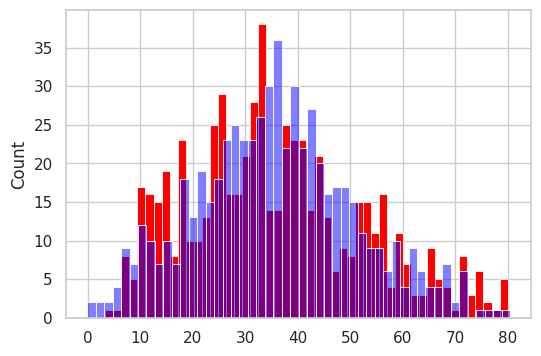

In [32]:
plt.figure(figsize=(6,4))
sns.histplot(y_train, alpha=1, color = "red", bins=50)
sns.histplot(y_train_pred, alpha=0.5, color = "blue", bins=50)

* A considerable increase on the prediction was achieved by applying the logaritm to the curing age.
* Due to the previous graph, it seems pausable a logarimit correlation between the superplastizier and the CS, so I wil check if the results is improved by taking the log of the plastizier content

In [33]:
df_al_spl= df.copy()
df_al_spl.age = np.log(df_al_spl.age)
df_al_spl.superplasticizer = np.log1p(df_al_spl.superplasticizer)


In [34]:
df_full_train, df_test = train_test_split(df_al_spl, test_size=0.2, random_state=4)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=4)
df_full_train.shape, df_train.shape, df_val.shape, df_test.shape

y_fulltrain = df_full_train["csmpa"].values
y_train = df_train["csmpa"].values
y_val = df_val["csmpa"].values
y_test = df_test["csmpa"].values

del df_full_train["csmpa"]
del df_train["csmpa"]
del df_val["csmpa"]
del df_test["csmpa"]

X_fulltrain = df_full_train.values
X_train = df_train.values
X_val = df_val.values
X_test = df_test.values

In [35]:
reg = LinearRegression().fit(X_train, y_train)
R2_train = reg.score(X_train, y_train)

y_train_pred = reg.predict(X_train)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)

R2_train, rmse_train

(0.8274333194210675, 7.010637665859664)

In [36]:
y_val_pred = reg.predict(X_val)
rmse_train = mean_squared_error(y_val, y_val_pred, squared=False)
rmse_train

6.562566351125031

<Axes: ylabel='Count'>

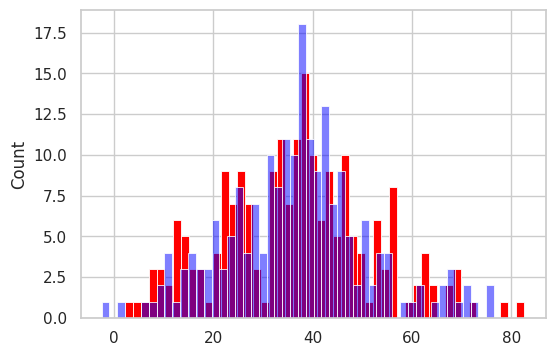

In [37]:
plt.figure(figsize=(6,4))
sns.histplot(y_val, alpha=1, color = "red", bins=50)
sns.histplot(y_val_pred, alpha=0.5, color = "blue", bins=50)

The improvement was very slightly and probably negligent.
I will not add it here, but if the log of any of the rest variables is taken, no improvement is achieved. This probably indicates that there are other variables not present in the original dataset that may have a significant impact in the final results

After checking that there is a better fitting that in the not featured engineered model, I proceed to do the training with the full training dataset and the evaluation with the test dataset

In [38]:
#Use the validation dataset to evaluate it
reg = LinearRegression().fit(X_fulltrain, y_fulltrain)
R2_train = reg.score(X_fulltrain, y_fulltrain)

y_test_pred = reg.predict(X_test)

rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

R2_train, rmse_test

(0.8259358257322081, 7.29459706756796)

<Axes: ylabel='Count'>

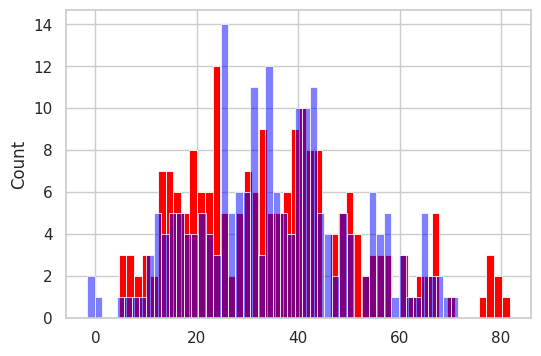

In [39]:
plt.figure(figsize=(6,4))
sns.histplot(y_test, alpha=1, color = "red", bins=50)
sns.histplot(y_test_pred, alpha=0.5, color = "blue", bins=50)

##  **3- Regression Trees and related models**




### **3.1 - Simple Regression Tree**

**3.1.1 No parametrization regression**

In [40]:
from sklearn.tree import DecisionTreeRegressor


In [41]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=4)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=4)
df_full_train.shape, df_train.shape, df_val.shape, df_test.shape

y_fulltrain = df_full_train["csmpa"].values
y_train = df_train["csmpa"].values
y_val = df_val["csmpa"].values
y_test = df_test["csmpa"].values

del df_full_train["csmpa"]
del df_train["csmpa"]
del df_val["csmpa"]
del df_test["csmpa"]

X_fulltrain = df_full_train.values
X_train = df_train.values
X_val = df_val.values
X_test = df_test.values

In [42]:
regressor = DecisionTreeRegressor(random_state=2)
regressor.fit(X_train, y_train)
y_train_pred = regressor.predict(X_train)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_train

0.36240856452012893

<Axes: ylabel='Count'>

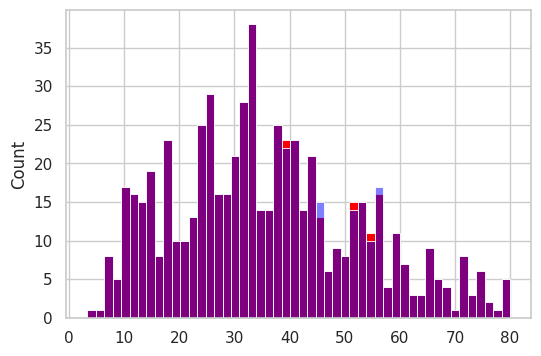

In [43]:
plt.figure(figsize=(6,4))
sns.histplot(y_train, alpha=1, color = "red", bins=50)
sns.histplot(y_train_pred, alpha=0.5, color = "blue", bins=50)

In [44]:
y_val_pred = regressor.predict(X_val)

rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)
rmse_val

7.825988763176141

<Axes: ylabel='Count'>

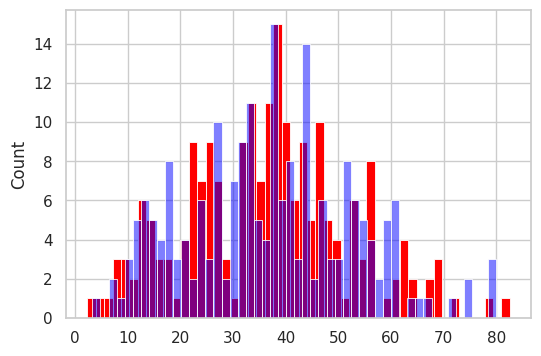

In [45]:
plt.figure(figsize=(6,4))
sns.histplot(y_val, alpha=1, color = "red", bins=50)
sns.histplot(y_val_pred, alpha=0.5, color = "blue", bins=50)

In [46]:
y_test_pred = regressor.predict(X_test)

rmse_val = mean_squared_error(y_test, y_test_pred, squared=False)
rmse_val

7.780430899103735

<Axes: ylabel='Count'>

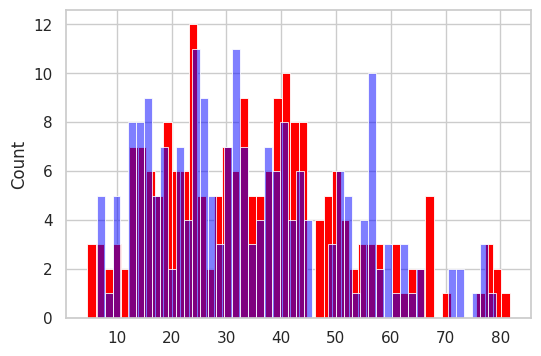

In [47]:
plt.figure(figsize=(6,4))
sns.histplot(y_test, alpha=1, color = "red", bins=50)
sns.histplot(y_test_pred, alpha=0.5, color = "blue", bins=50)

In this first test I try the regression tree without attemping any optimization in the regression tree parametters. Even is there is overfitting related to the trian dataset, the error optained after testin the valistaion and the test datasets are slightly worst than the linear regression optimized model.

**3.1.2 Parameters Optimization**

In [48]:
  regressor.get_depth()

18

In [49]:
depths = np.arange(1,19)
scores=[]
for depth in depths:
  regressor = DecisionTreeRegressor(max_depth = depth, random_state=2)
  regressor.fit(X_train, y_train)
  y_val_pred = regressor.predict(X_val)
  rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)
  scores.append(rmse_val)
  print(f"For a depth of {depth} the error is {rmse_val}")


For a depth of 1 the error is 14.081469748631623
For a depth of 2 the error is 11.632193114032152
For a depth of 3 the error is 9.96132149050498
For a depth of 4 the error is 8.91772196365898
For a depth of 5 the error is 8.21724547631874
For a depth of 6 the error is 7.811504265207528
For a depth of 7 the error is 7.890534159832796
For a depth of 8 the error is 7.605576849474503
For a depth of 9 the error is 7.792479438773437
For a depth of 10 the error is 7.336710468233888
For a depth of 11 the error is 7.43146793972246
For a depth of 12 the error is 7.050058525582764
For a depth of 13 the error is 7.667959834010727
For a depth of 14 the error is 7.270576192183064
For a depth of 15 the error is 7.529302851589919
For a depth of 16 the error is 7.407036985097187
For a depth of 17 the error is 7.851059340432366
For a depth of 18 the error is 7.825988763176141


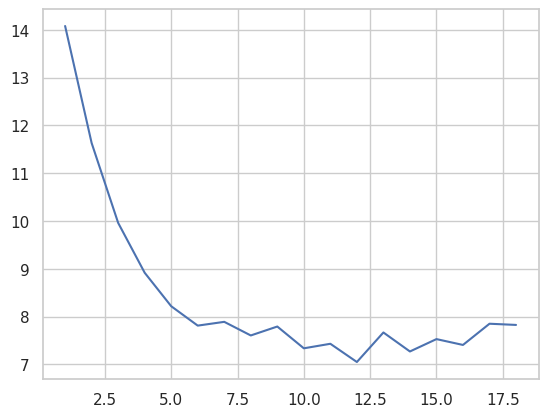

In [50]:
plt.plot(depths, scores)

Tbe minimum value is achieved with a deepth of 12, but due to the noise a value between 12 and 15 should work fine for predition

In [51]:
depths = np.arange(1,19)
scores=[]
for depth in depths:
  regressor = DecisionTreeRegressor(max_depth = depth, random_state=2)
  regressor.fit(X_fulltrain, y_fulltrain)
  y_test_pred = regressor.predict(X_test)
  rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
  scores.append(rmse_test)
  print(f"For a depth of {depth} the error is {rmse_test}")

For a depth of 1 the error is 16.299564732700507
For a depth of 2 the error is 12.541979326408017
For a depth of 3 the error is 11.03011539181506
For a depth of 4 the error is 9.171282512780063
For a depth of 5 the error is 7.854859842404978
For a depth of 6 the error is 7.071629602686094
For a depth of 7 the error is 6.518132022851846
For a depth of 8 the error is 6.519540603623413
For a depth of 9 the error is 6.543598130320968
For a depth of 10 the error is 6.450660909235403
For a depth of 11 the error is 6.334922896740414
For a depth of 12 the error is 6.108467102716806
For a depth of 13 the error is 6.136405538519211
For a depth of 14 the error is 5.909821640273839
For a depth of 15 the error is 5.917175092700055
For a depth of 16 the error is 6.266768001874682
For a depth of 17 the error is 6.117495065285007
For a depth of 18 the error is 6.029993217565298


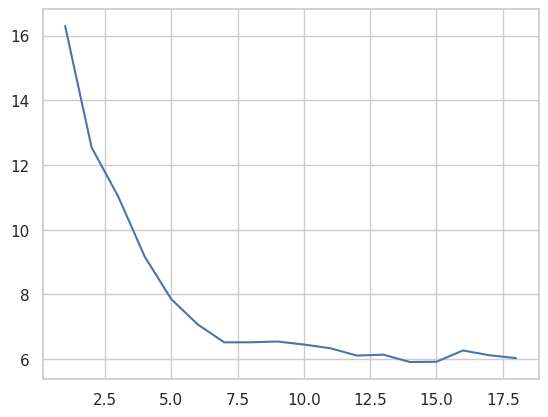

In [52]:
plt.plot(depths, scores)

The minimumn error can be found at a deepth of 15.
Now I will proceed to train the model at a max depth of 15 and graph the frequency of the compression strenghts

In [53]:
  regressor = DecisionTreeRegressor(max_depth = 15, random_state=2)
  regressor.fit(X_fulltrain, y_fulltrain)
  y_test_pred = regressor.predict(X_test)
  rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
rmse_test

5.917175092700055

<Axes: ylabel='Count'>

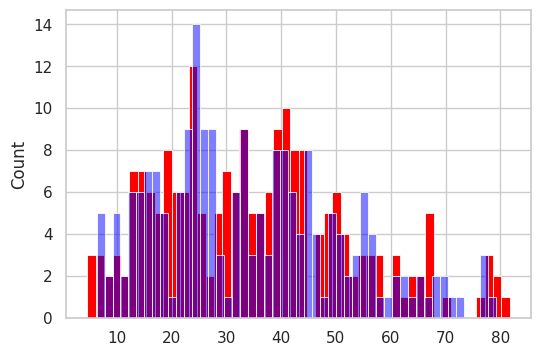

In [54]:
plt.figure(figsize=(6,4))
sns.histplot(y_test, alpha=1, color = "red", bins=50)
sns.histplot(y_test_pred, alpha=0.5, color = "blue", bins=50)

### **3.2 - Regression Forest for Strenght Prediction**

3.2.1 Simple Regression Forest with no optimization

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
rfr = RandomForestRegressor(random_state=0)
rfr.fit(X_train, y_train)
y_val_pred = rfr.predict(X_val)

rmse = mean_squared_error(y_val, y_val_pred, squared = False)
rmse

5.231720545409245

<Axes: ylabel='Count'>

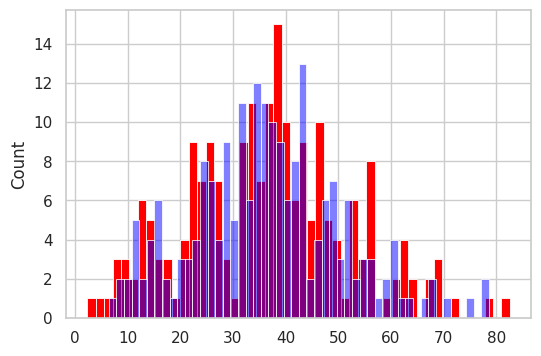

In [57]:
plt.figure(figsize=(6,4))
sns.histplot(y_val, alpha=1, color = "red", bins=50)
sns.histplot(y_val_pred, alpha=0.5, color = "blue", bins=50)

In [58]:
y_test_pred = rfr.predict(X_test)

rmse = mean_squared_error(y_test, y_test_pred, squared = False)
rmse

5.206334998658517

The Regression Tree is the model that better results has shown so far, with the minimum square error achieved at the moment even without doing any particular optimization



```
# Isto está formatado como código
```

**3.2.2 Regression Forest with parameters optimization**

In this section the following paramethers will be evaluated, by separate and in *combination*:
* Number of stimators
* Max Deepth
* Minimum Sample Leaft




In [59]:
stimators = np.arange(5, 101, 5)
scores = []
for stimator in stimators:
  rfr = RandomForestRegressor(n_estimators = stimator, random_state=0)
  rfr.fit(X_train, y_train)
  y_val_pred = rfr.predict(X_val)

  rmse = mean_squared_error(y_val, y_val_pred, squared = False)
  scores.append(rmse)
  print(stimator, rmse)

5 5.814792283561888
10 5.443253396430869
15 5.43422802419038
20 5.360725510919236
25 5.321195100135874
30 5.284198197407053
35 5.285569250920368
40 5.246713386117317
45 5.228788657897182
50 5.213352825222558
55 5.217014452866682
60 5.219987615427875
65 5.22016552398443
70 5.237167377358283
75 5.248389928338748
80 5.247405395464562
85 5.24887866124212
90 5.247006977600688
95 5.246420756936527
100 5.231720545409245


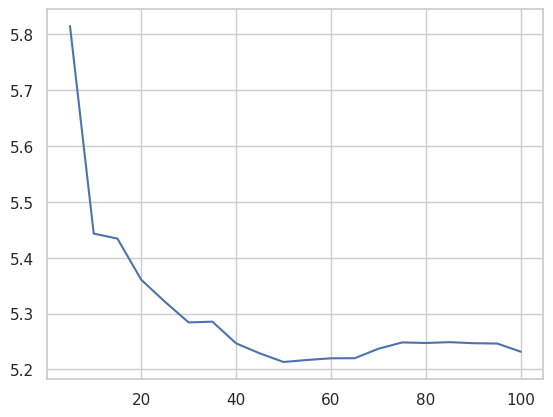

In [60]:
plt.plot(stimators, scores)

A  numeber of trees between 50 and 60 are the optimal amount

Now I will test the number of stimators and the maximum deepth for each tree in conjuction to check that the number of stimators is still optimumn in the same range or not

In [61]:
estimators = np.arange(5, 101, 5)
depths = np.arange(3, 28, 3)
columns = ['estimators', 'depths', 'rmse']
df_results = pd.DataFrame(columns=columns)
for estimator in estimators:
  for depth in depths:
    rfr = RandomForestRegressor(n_estimators = estimator, max_depth= depth, random_state=0)
    rfr.fit(X_train, y_train)
    y_val_pred = rfr.predict(X_val)
    rmse = mean_squared_error(y_val, y_val_pred, squared = False)
    new_row = pd.DataFrame([[estimator, depth, rmse]], columns=columns)
    df_results = pd.concat([df_results, new_row], ignore_index=True)


In [62]:
df_results.estimators = pd.to_numeric(df_results.estimators)
df_results.depths = pd.to_numeric(df_results.depths)
df_results.dtypes

estimators      int64
depths          int64
rmse          float64
dtype: object

In [63]:
df_scores_pivot = df_results.pivot(index='depths', columns=['estimators'], values=['rmse'])
df_scores_pivot.round(3)

rmse                                                          \
estimators    5      10     15     20     25     30     35     40     45    
depths                                                                      
3           9.532  9.048  9.203  9.179  9.148  9.172  9.192  9.033  9.041   
6           6.897  6.202  6.119  6.043  6.077  6.066  6.046  5.986  6.009   
9           5.967  5.514  5.518  5.422  5.472  5.445  5.443  5.401  5.383   
12          5.842  5.406  5.395  5.317  5.287  5.242  5.222  5.195  5.166   
15          5.952  5.399  5.348  5.266  5.282  5.225  5.214  5.175  5.155   
18          5.777  5.400  5.398  5.358  5.325  5.292  5.287  5.246  5.228   
21          5.829  5.444  5.434  5.360  5.321  5.284  5.285  5.246  5.228   
24          5.815  5.443  5.434  5.361  5.321  5.284  5.286  5.247  5.229   
27          5.815  5.443  5.434  5.361  5.321  5.284  5.286  5.247  5.229   

                                                                           \
estimators    50     55     60     65     70     75     80     85     90    
depths                                                                      
3           9.059  9.025  9.039  9.044  9.000  8.988  8.998  8.966  8.987   
6           6.000  6.002  6.022  6.021  6.037  6.041  6.043  6.022  6.028   
9           5.365  5.364  5.347  5.357  5.373  5.387  5.380  5.379  5.378   
12          5.154  5.167  5.169  5.177  5.203  5.218  5.206  5.213  5.226   
15          5.135  5.146  5.153  5.157  5.185  5.204  5.201  5.203  5.208   
18          5.220  5.223  5.222  5.219  5.237  5.247  5.245  5.245  5.239   
21          5.219  5.222  5.224  5.220  5.237  5.248  5.247  5.249  5.247   
24          5.213  5.217  5.220  5.220  5.237  5.248  5.247  5.249  5.247   
27          5.213  5.217  5.220  5.220  5.237  5.248  5.247  5.249  5.247   

                          
estimators    95     100  
depths                    
3           9.002  9.012  
6           6.034  6.032  
9           5.378  5.379  
12          5.226  5.222  
15          5.210  5.197  
18          5.239  5.227  
21          5.247  5.235  
24          5.246  5.232  
27          5.246  5.232

<Axes: xlabel='None-estimators', ylabel='depths'>

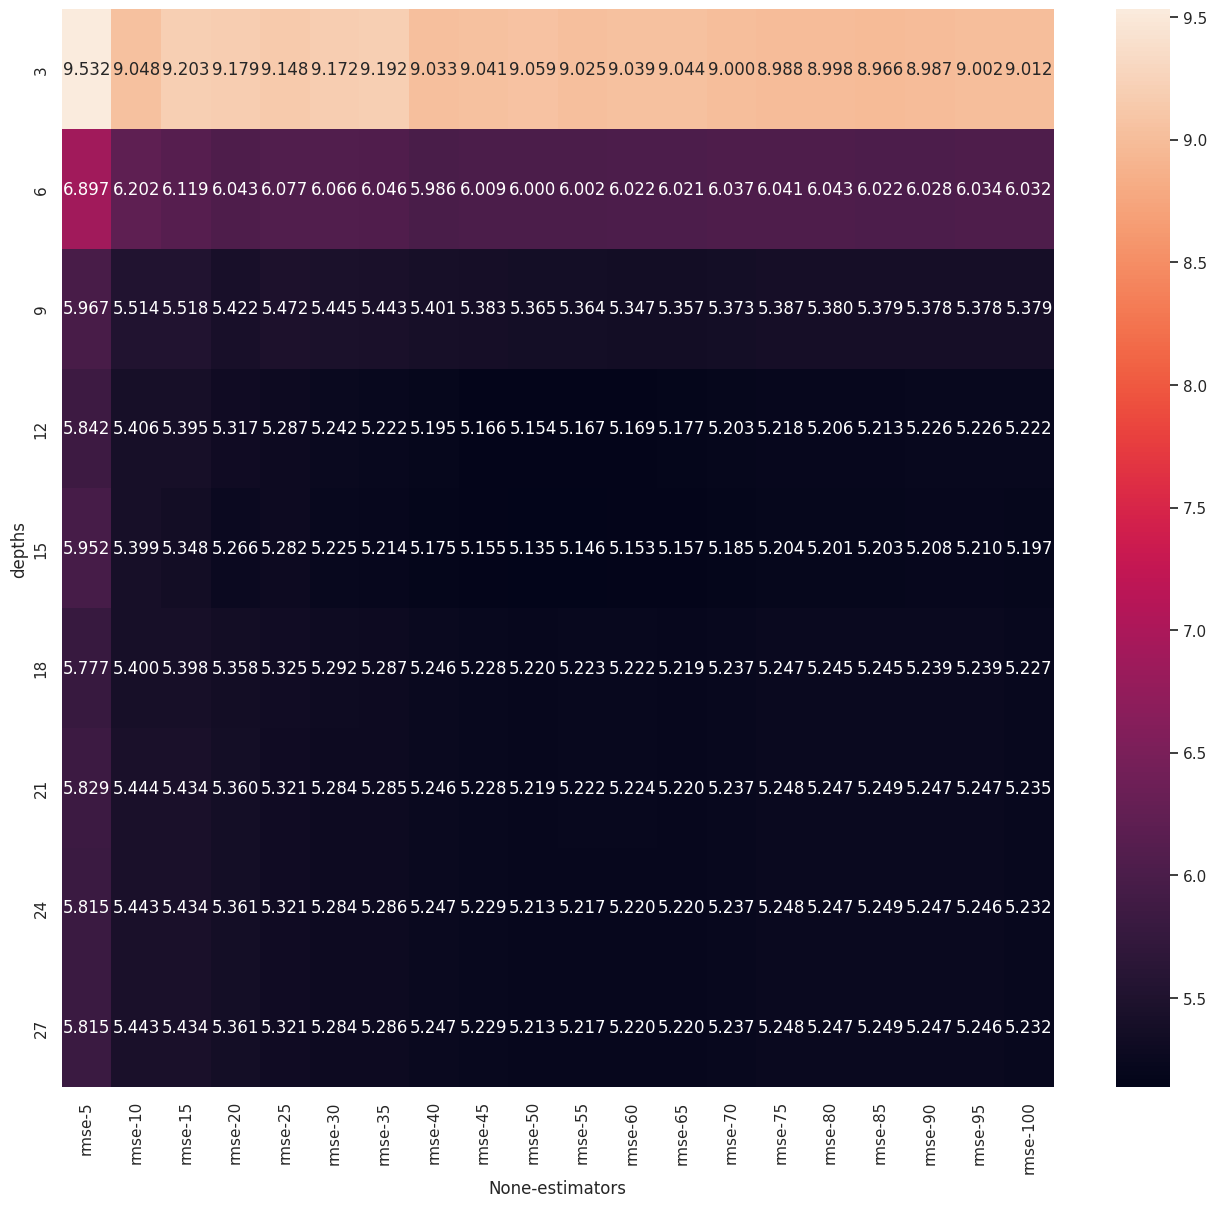

In [64]:
plt.figure(figsize=(16, 14))  # Set the size of the figure (width, height)
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

A total dept of 40 should be enought to get good results. Also, this show that a depth of 18 levels in the tree show be enoght


Now I will proceed to fix the the number of stimators to 45 and modify the number of min. leaft and max. depth together

In [65]:
mleafa = [1, 5, 10, 15, 20, 500, 100, 200]
depths = np.arange(3, 28, 3)
columns = ['min_samples_leaf', 'max_depth', 'rmse']
df_results = pd.DataFrame(columns=columns)
for mleaf in mleafa:
  for depth in depths:
    rfr = RandomForestRegressor(n_estimators = 45, max_depth= depth, min_samples_leaf= mleaf , random_state=0)
    rfr.fit(X_train, y_train)
    y_val_pred = rfr.predict(X_val)
    rmse = mean_squared_error(y_val, y_val_pred, squared = False)
    new_row = pd.DataFrame([[mleaf, depth, rmse]], columns=columns)
    df_results = pd.concat([df_results, new_row], ignore_index=True)

In [66]:
df_results.min_samples_leaf = pd.to_numeric(df_results.min_samples_leaf)
df_results.max_depth = pd.to_numeric(df_results.max_depth)
df_results.dtypes

min_samples_leaf      int64
max_depth             int64
rmse                float64
dtype: object

In [67]:
df_scores_pivot = df_results.pivot(index='max_depth', columns=['min_samples_leaf'], values=['rmse'])
df_scores_pivot.round(3)

rmse                                                    
min_samples_leaf    1      5      10     15     20      100     200     500
max_depth                                                                  
3                 9.041  9.024  9.017  9.175  9.250  11.524  14.775  15.392
6                 6.009  6.328  6.921  7.509  7.947  11.524  14.775  15.392
9                 5.383  5.956  6.821  7.473  7.937  11.524  14.775  15.392
12                5.166  5.935  6.820  7.473  7.937  11.524  14.775  15.392
15                5.155  5.935  6.820  7.473  7.937  11.524  14.775  15.392
18                5.228  5.935  6.820  7.473  7.937  11.524  14.775  15.392
21                5.228  5.935  6.820  7.473  7.937  11.524  14.775  15.392
24                5.229  5.935  6.820  7.473  7.937  11.524  14.775  15.392
27                5.229  5.935  6.820  7.473  7.937  11.524  14.775  15.392

<Axes: xlabel='None-min_samples_leaf', ylabel='max_depth'>

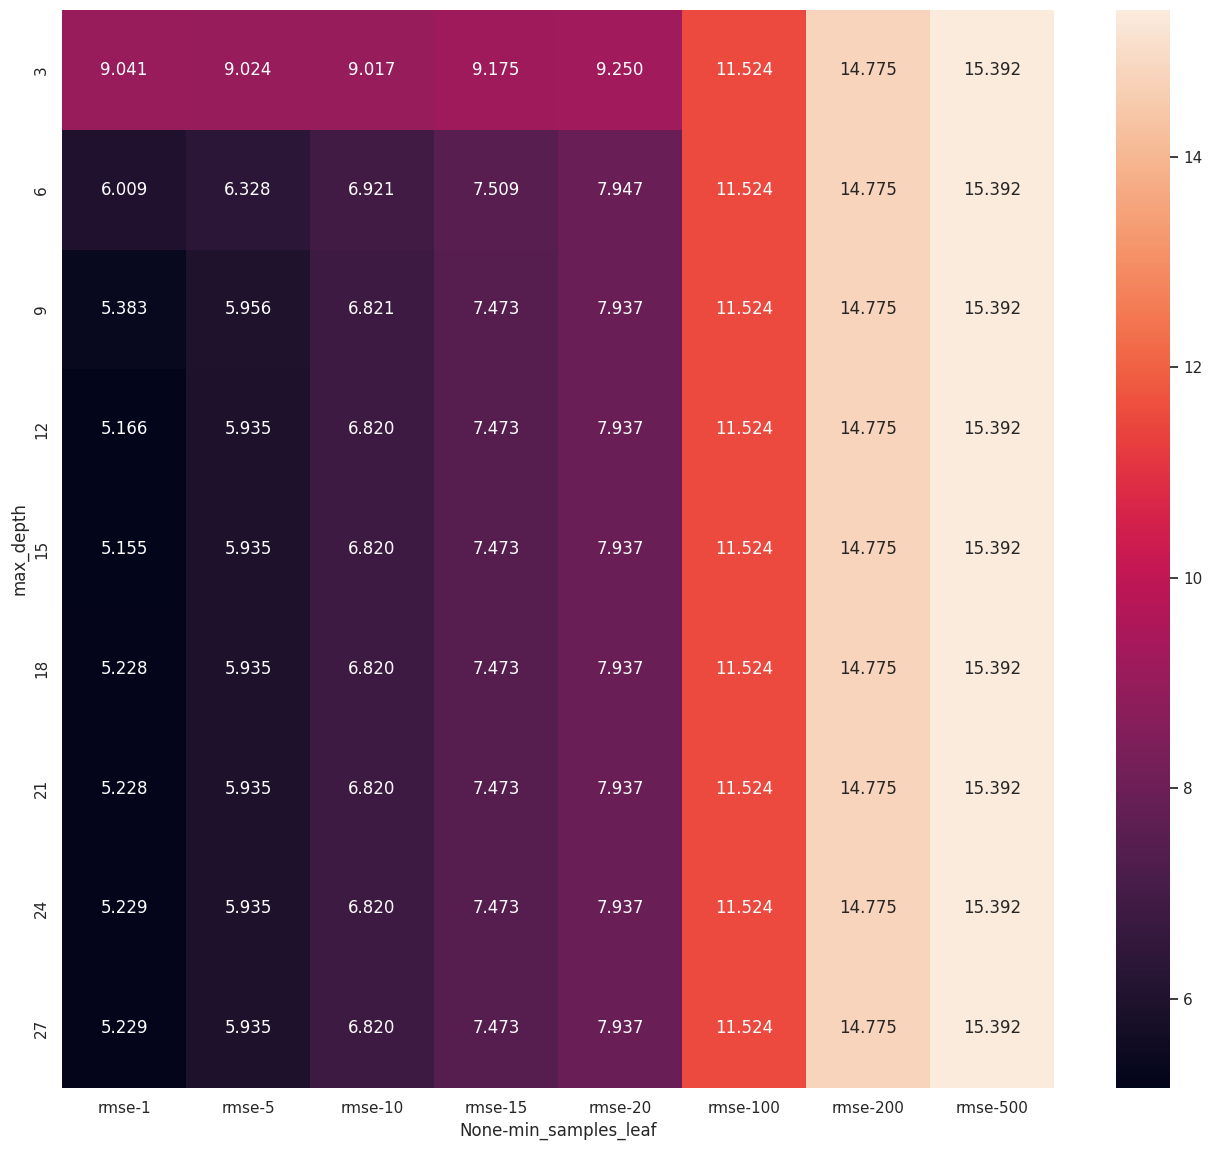

In [68]:
plt.figure(figsize=(16, 14))  # Set the size of the figure (width, height)
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

The Best results are acchived with a max. depth of 15 and a minimum sample leaf of 1. I will proceed to train the model with this parameters using the full training dataset and evaluate it using the test dataset

In [69]:
rfr = RandomForestRegressor(n_estimators = 45, max_depth= 15, min_samples_leaf=1 , random_state=0)
rfr.fit(X_fulltrain, y_fulltrain)
y_test_pred = rfr.predict(X_test)
rmse = mean_squared_error(y_test, y_test_pred, squared = False)
rmse


4.744747741793733

<Axes: ylabel='Count'>

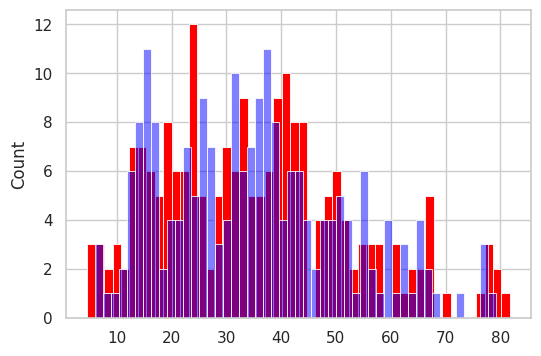

In [70]:
plt.figure(figsize=(6,4))
sns.histplot(y_test, alpha=1, color = "red", bins=50)
sns.histplot(y_test_pred, alpha=0.5, color = "blue", bins=50)

So Far this are the best achieved result, with an error of 4.72 MPa in the prediction. This value is high for the model being used on real applications, but it is an improvement related to the linear model that the best results produced an error around 7.29 MPa and the results of a single tree that is around 5.2 MPa.
In the next section we will try to use a Gradient boosting as model to try to get better results

## **3.3 Gradient Boosting for Compression Strengh prediction**

In this section the following paramethers will be evaluated, by separate and in *combination*:
* eta
* Max Depth
* Minimum Sample Leaft


In [71]:
import xgboost as xgb

In [72]:
features = df_train.columns.to_list()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)


In [73]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [74]:
%%capture output

scores = {}
xgb_params = {
    'eta': 0.03,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}
evals_result = {}

model = xgb.train(xgb_params, dtrain, num_boost_round=300,
                  verbose_eval=5,
                  evals=watchlist,
                  evals_result=evals_result)

In [75]:
evals_result["val"]["rmse"][-1]

5.013455400789171

In [76]:
s = output.stdout

In [77]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))

    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [78]:
df_score = parse_xgb_output(output)

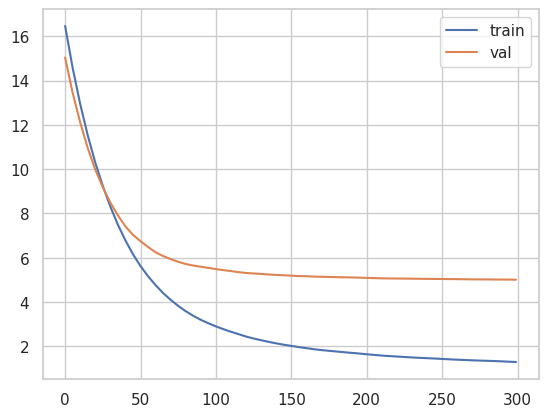

In [79]:
plt.plot(df_score.num_iter, df_score.train_rmse, label='train')
plt.plot(df_score.num_iter, df_score.val_rmse, label='val')
plt.legend()

In [80]:
df_score.loc[30]

num_iter      150.0000
train_rmse      2.0262
val_rmse        5.1963
Name: 30, dtype: float64

In [81]:
depths = np.arange(3,18,3)
child_weights = [1, 5, 10, 15, 25, 50, 100]
columns = ['depth', 'weigths', 'rmse']
df_scores = pd.DataFrame(columns=columns)

for depth in depths:
  for cw in child_weights:
    xgb_params = {
        'eta': 0.05,
        'max_depth': depth,
        'min_child_weight': cw,

        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'nthread': 8,

        'seed': 1,
        'verbosity': 0,
    }
    evals_result = {}
    model = xgb.train(xgb_params, dtrain, num_boost_round=300,
                      verbose_eval=5,
                      evals=watchlist,
                      evals_result=evals_result)
    val_rmse = evals_result["val"]["rmse"][-1]
    df_row = pd.DataFrame([[depth, cw, val_rmse]], columns=columns)
    df_scores = pd.concat([df_scores, df_row], ignore_index=True)



[0]	train-rmse:16.35614	val-rmse:14.91427
[5]	train-rmse:14.15999	val-rmse:12.99961
[10]	train-rmse:12.40383	val-rmse:11.51238
[15]	train-rmse:11.08318	val-rmse:10.44594
[20]	train-rmse:9.98448	val-rmse:9.57117
[25]	train-rmse:9.09574	val-rmse:8.89744
[30]	train-rmse:8.39880	val-rmse:8.36041
[35]	train-rmse:7.79824	val-rmse:7.89013
[40]	train-rmse:7.33610	val-rmse:7.49864
[45]	train-rmse:6.93232	val-rmse:7.19157
[50]	train-rmse:6.55312	val-rmse:6.88353
[55]	train-rmse:6.25201	val-rmse:6.63558
[60]	train-rmse:5.97517	val-rmse:6.36934
[65]	train-rmse:5.75572	val-rmse:6.21023
[70]	train-rmse:5.58405	val-rmse:6.08104
[75]	train-rmse:5.41164	val-rmse:5.96446
[80]	train-rmse:5.26077	val-rmse:5.86405
[85]	train-rmse:5.11693	val-rmse:5.80639
[90]	train-rmse:4.99365	val-rmse:5.72591
[95]	train-rmse:4.88707	val-rmse:5.66714
[100]	train-rmse:4.78921	val-rmse:5.60890
[105]	train-rmse:4.69821	val-rmse:5.54473
[110]	train-rmse:4.62683	val-rmse:5.50071
[115]	train-rmse:4.55523	val-rmse:5.45375
[120]	

In [82]:
df_scores

,depth,weigths,rmse
0,3,1,4.788357
1,3,5,4.755936
2,3,10,4.789084
3,3,15,4.925208
4,3,25,5.026240
5,3,50,5.624353
6,3,100,6.428570
7,6,1,4.999500
8,6,5,4.645515
9,6,10,4.651649


In [83]:
df_scores_pivot = df_scores.pivot(index='depth', columns=['weigths'], values=['rmse'])
df_scores_pivot.round(3)

<ipython-input-83-45a0728bbbfd>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_scores_pivot = df_scores.pivot(index='depth', columns=['weigths'], values=['rmse'])
<ipython-input-83-45a0728bbbfd>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_scores_pivot = df_scores.pivot(index='depth', columns=['weigths'], values=['rmse'])


rmse                                          
weigths    1      5      10     15     25     50     100
depth                                                   
3        4.788  4.756  4.789  4.925  5.026  5.624  6.429
6        4.999  4.646  4.652  4.695  4.881  5.149  6.254
9        4.854  4.743  4.497  4.681  4.709  5.116  6.254
12       5.012  4.884  4.578  4.680  4.675  5.116  6.254
15       5.053  4.886  4.554  4.657  4.713  5.116  6.254

<Axes: xlabel='None-weigths', ylabel='depth'>

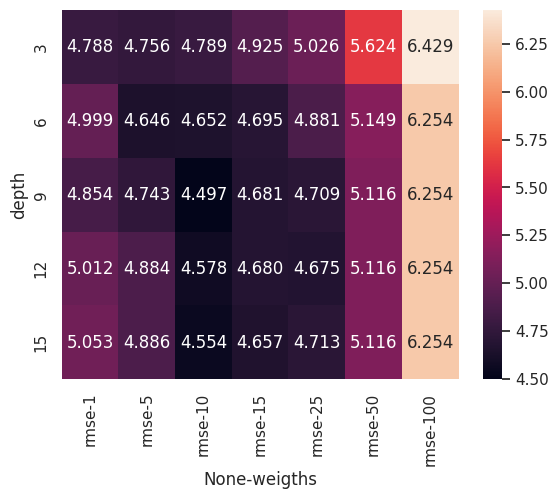

In [84]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

The best results are obtained for a depth of 9 and a min. child weight of 10.

In [85]:
features = df_full_train.columns.to_list()
dfulltrain = xgb.DMatrix(X_fulltrain, label=y_fulltrain, feature_names=features)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=features)

watchlist = [(dfulltrain, 'fulltrain'), (dtest, 'test')]

depth = 9
child_weight = 10

xgb_params = {
        'eta': 0.05,
        'max_depth': depth,
        'min_child_weight': child_weight,

        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'nthread': 8,

        'seed': 1,
        'verbosity': 0,
        }
evals_result = {}
model = xgb.train(xgb_params, dfulltrain, num_boost_round=200,
                      verbose_eval=0,
                      evals=watchlist,
                      evals_result=evals_result)
test_rmse = evals_result["test"]["rmse"][-1]

In [86]:
test_rmse

4.437860259332866

In [87]:
y_test_pred = model.predict(dtest)

<Axes: ylabel='Count'>

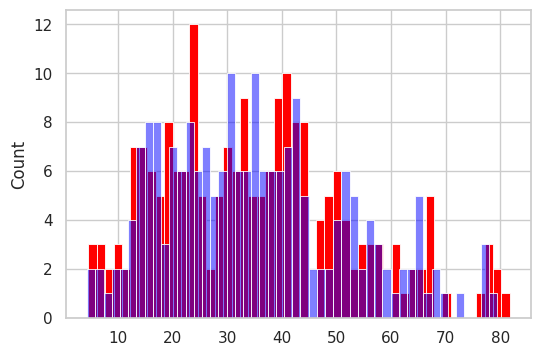

In [88]:
plt.figure(figsize=(6,4))
sns.histplot(y_test, alpha=1, color = "red", bins=50)
sns.histplot(y_test_pred, alpha=0.5, color = "blue", bins=50)

The RMSE value obtained with the optimized values was of 4.43 MPa

##  **4- Model Selection**

The following results are the best values obtained with each different model:
* Linear Regression RMSE: 7.29 MPa
* Regression Tree RMSE: 5.92 MPa
* Regression Forest RMSE: 4.74 MPa
* Gradient Boosting RMSE: 4.43 MPa

The Gradient Boosting is the model that gives the lower error, so it will be selected for testing the dataset.

As it cab be observed, the values for the prediction are still high for an strength prediction. This could be basically due to the fact that same important information is missing in the dateset that should be available in a real project like it is:
* Fine aggregate size distribution
* Coarse aggregate size distribution
* Type of coarse aggregate shape (rounded, sharp, etc.)
* Cement nominal strength (the one specified by the manufacturer)
* Type of cement employed

This model can be adapted to that information if available and be used for a more precise prediction.